In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
data=df.copy()

In [4]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
str(data)

'         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \\\n0       43390          1            1000       1         5   \n1       43599          1            1307     348        66   \n2       43605          1            1343     383        61   \n3       43329          2            2373     974        69   \n4       43330          2            2426    1038       108   \n...       ...        ...             ...     ...       ...   \n264831  43533        272          272319  270088        89   \n264832  43325        272          272358  270154        74   \n264833  43410        272          272379  270187        51   \n264834  43461        272          272379  270188        42   \n264835  43365        272          272380  270189        74   \n\n                                       PROD_NAME  PROD_QTY  TOT_SALES  \n0         Natural Chip        Compny SeaSalt175g         2        6.0  \n1                       CCs Nacho Cheese    175g         3        6.3  \n2         Smiths Crin

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
#date column is int format. lets convert to date format

In [8]:
from datetime import datetime
data['DATE']=pd.to_datetime(data['DATE']  ,origin='1899-12-30' ,unit='D')

In [9]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [11]:
data['PROD_NAME'].head(10)

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6    Smiths Crinkle Chips Salt & Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9       Grain Waves Sour    Cream&Chives 210G
Name: PROD_NAME, dtype: object

In [12]:
# now we need to choose only oteto chips from data

In [13]:
data['PROD_NAME'].value_counts().head(10)

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: PROD_NAME, dtype: int64

In [14]:
new_data=data.loc[data['PROD_NAME'].str.contains("chip|chp", case=False)]

In [15]:
new_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


In [16]:
new_data.shape

(87335, 8)

In [17]:
new_data=new_data.applymap(lambda x: x.lower() if type(x) == str else x)
new_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,smiths crinkle chips salt & vinegar 330g,1,5.7


In [18]:
new_data['SIZE_GR']=new_data['PROD_NAME'].str.extract('(\d+)')

In [19]:
new_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_GR
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,175
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,150
6,2019-05-16,4,4149,3333,16,smiths crinkle chips salt & vinegar 330g,1,5.7,330


In [20]:
# and now lets chech summary data
new_data.describe()  #i cant see here size column because that column is not int format

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,87335.000000,8.733500e+04,87335.000000,87335.000000,87335.000000,87335.000000
mean,135.525185,1.360239e+05,135604.567127,49.949619,1.910620,7.286420
std,76.853472,8.095134e+04,78071.398801,34.450103,1.007451,3.943887
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,70.000000,7.010000e+04,68056.500000,16.000000,2.000000,6.000000
50%,131.000000,1.314830e+05,135822.000000,42.000000,2.000000,6.600000
75%,203.000000,2.032830e+05,203488.000000,78.000000,2.000000,8.800000
max,272.000000,2.373711e+06,270209.000000,111.000000,200.000000,650.000000


In [21]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87335 entries, 0 to 264834
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            87335 non-null  datetime64[ns]
 1   STORE_NBR       87335 non-null  int64         
 2   LYLTY_CARD_NBR  87335 non-null  int64         
 3   TXN_ID          87335 non-null  int64         
 4   PROD_NBR        87335 non-null  int64         
 5   PROD_NAME       87335 non-null  object        
 6   PROD_QTY        87335 non-null  int64         
 7   TOT_SALES       87335 non-null  float64       
 8   SIZE_GR         87335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 6.7+ MB


In [22]:
type(new_data['SIZE_GR'])

pandas.core.series.Series

In [23]:
new_data['SIZE_GR']=new_data['SIZE_GR'].astype(np.int64)

In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87335 entries, 0 to 264834
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            87335 non-null  datetime64[ns]
 1   STORE_NBR       87335 non-null  int64         
 2   LYLTY_CARD_NBR  87335 non-null  int64         
 3   TXN_ID          87335 non-null  int64         
 4   PROD_NBR        87335 non-null  int64         
 5   PROD_NAME       87335 non-null  object        
 6   PROD_QTY        87335 non-null  int64         
 7   TOT_SALES       87335 non-null  float64       
 8   SIZE_GR         87335 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 6.7+ MB


In [25]:
new_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_GR
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,175
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,150
6,2019-05-16,4,4149,3333,16,smiths crinkle chips salt & vinegar 330g,1,5.7,330


In [26]:
new_data.describe() #here is max=200 in prod_qty

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,SIZE_GR
count,87335.000000,8.733500e+04,87335.000000,87335.000000,87335.000000,87335.000000,87335.000000
mean,135.525185,1.360239e+05,135604.567127,49.949619,1.910620,7.286420,183.845137
std,76.853472,8.095134e+04,78071.398801,34.450103,1.007451,3.943887,67.206803
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000,110.000000
25%,70.000000,7.010000e+04,68056.500000,16.000000,2.000000,6.000000,150.000000
50%,131.000000,1.314830e+05,135822.000000,42.000000,2.000000,6.600000,170.000000
75%,203.000000,2.032830e+05,203488.000000,78.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,270209.000000,111.000000,200.000000,650.000000,380.000000


In [27]:
#and know lets check null value
new_data.isnull().sum()    #good there is not null 

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
SIZE_GR           0
dtype: int64

In [28]:
new_data[new_data['PROD_QTY']==200] #probably this human buy to sell  we will remove this customer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_GR
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme 380g,200,650.0,380
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme 380g,200,650.0,380


In [29]:
new_data=new_data.drop([69762 , 69763])  #removed

C:\anaconda_2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


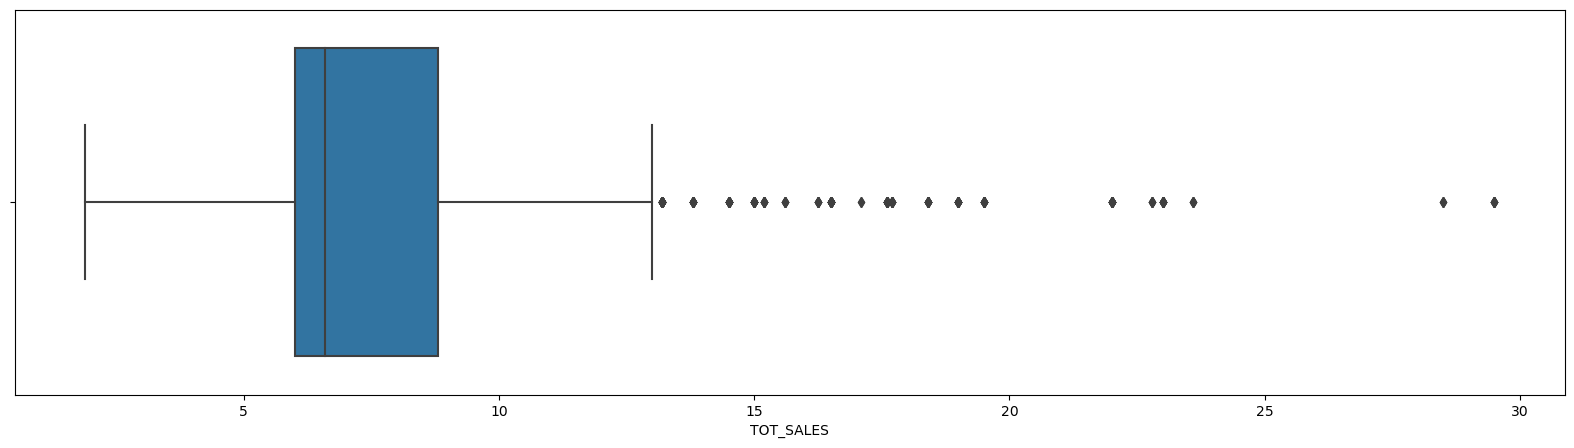

In [30]:
#check outliers
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
figure=sns.boxplot(new_data['TOT_SALES'])

In [31]:
Q1=new_data['TOT_SALES'].quantile(0.25)
Q2=new_data['TOT_SALES'].quantile(0.75)

In [32]:
IQR=Q2-Q1

In [33]:
Q1 , Q2 , IQR

(6.0, 8.8, 2.8000000000000007)

In [34]:
data_col=new_data['TOT_SALES']

In [35]:
lower=Q1-1.5*IQR

In [36]:
upper=Q2+1.5*IQR

In [37]:
data_col[data_col<lower]

Series([], Name: TOT_SALES, dtype: float64)

In [38]:
data_col[data_col>upper]  #here are outlier

3         15.0
4         13.8
100       19.0
102       17.6
109       13.2
          ... 
258597    13.8
258632    16.5
258637    13.8
258726    16.5
258759    13.2
Name: TOT_SALES, Length: 259, dtype: float64

In [39]:
data_col.mean()

7.2717014187059466

In [40]:
data_col[data_col>upper]=data_col.mean()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9792\229982178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_col[data_col>upper]=data_col.mean()


C:\anaconda_2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


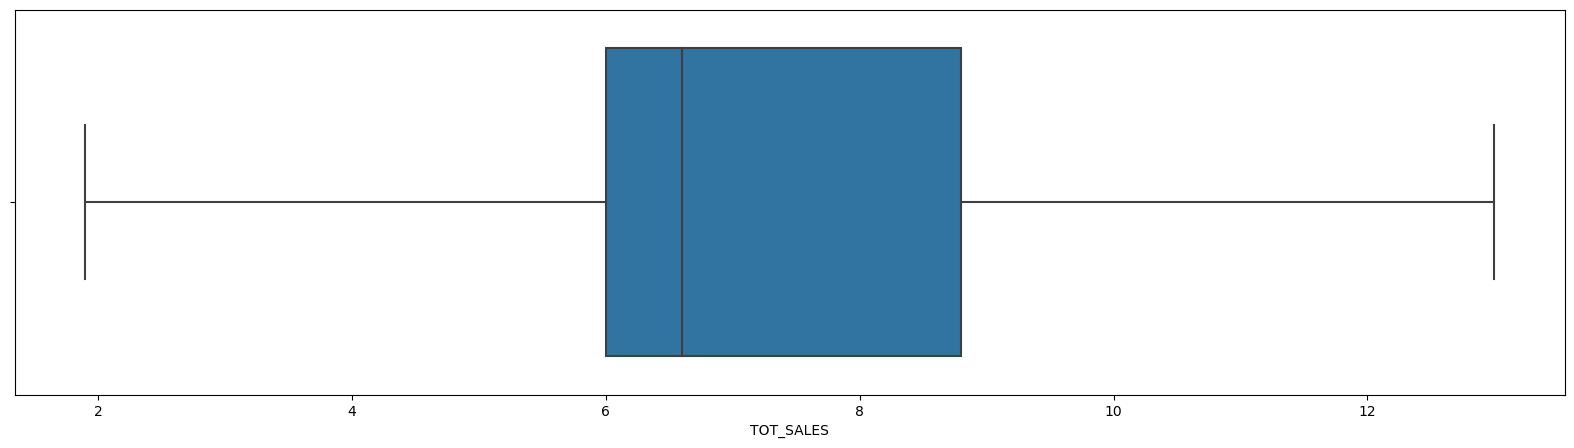

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
figure=sns.boxplot(data_col)   #veruy good we fix outliers values

C:\anaconda_2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


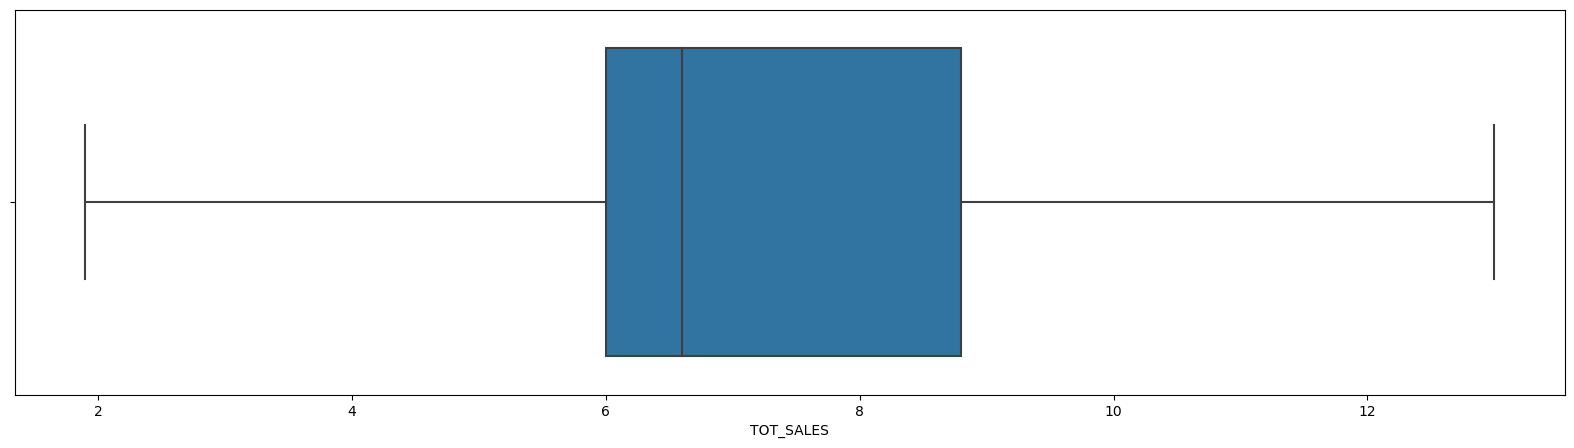

In [42]:
plt.figure(figsize=(20,5))
figure=sns.boxplot(new_data['TOT_SALES'])

In [43]:
new_data['DATE'].isnull().any()

False

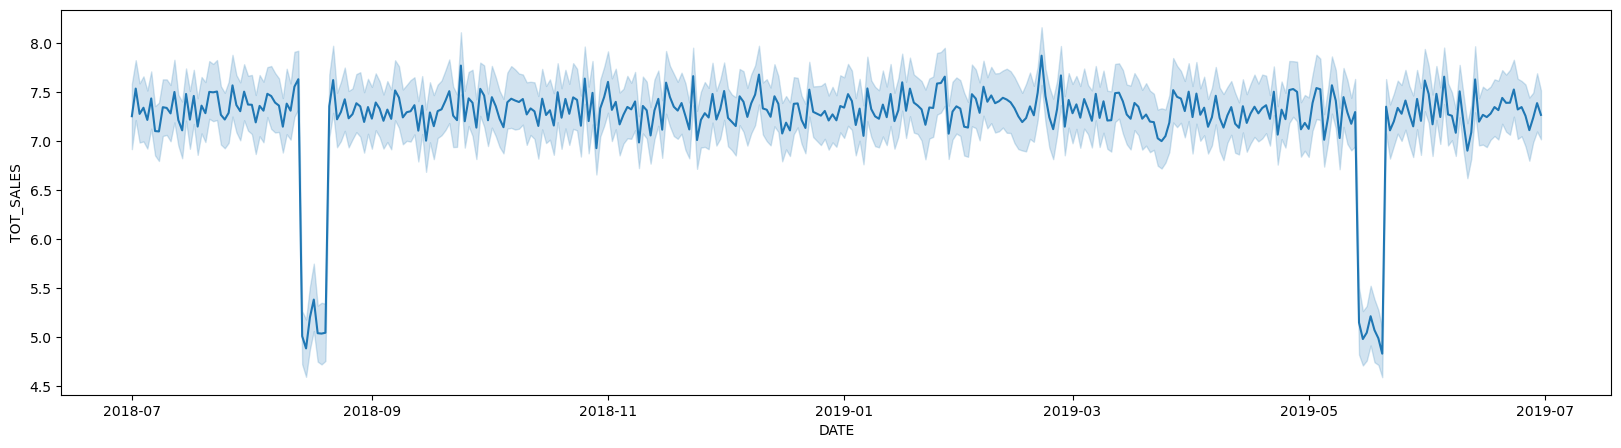

In [44]:
plt.figure(figsize=(20,5))
figure=sns.lineplot(x=new_data['DATE'] , y=new_data['TOT_SALES'])

In [45]:
sample1=new_data[(new_data['DATE']<='2018-9') &  (new_data['DATE']>='2018-08')] 

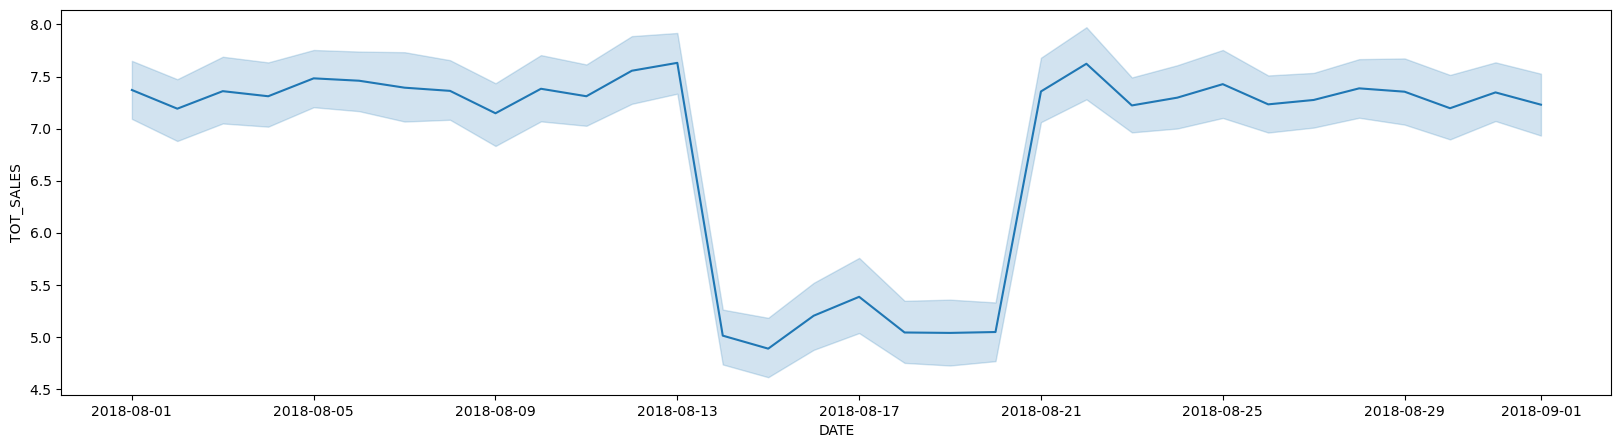

In [46]:
plt.figure(figsize=(20,5))
figure=sns.lineplot(x=sample1['DATE'] , y=sample1['TOT_SALES'])

In [47]:
sample2=new_data[(new_data['DATE']<='2019-06') &  (new_data['DATE']>='2019-05')] 

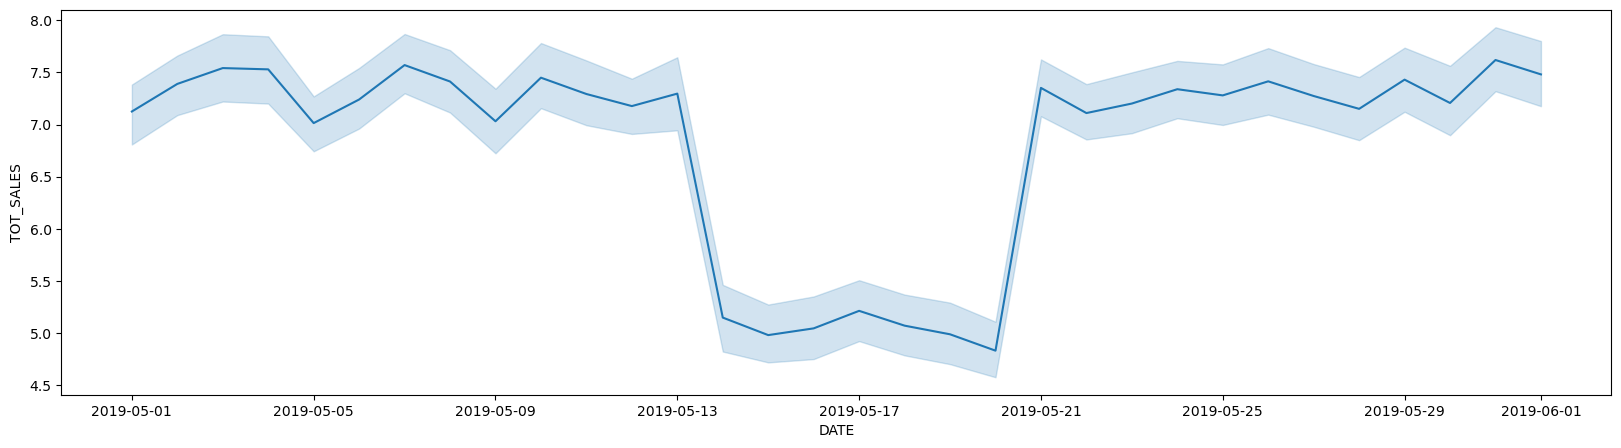

In [48]:
plt.figure(figsize=(20,5))
figure=sns.lineplot(x=sample2['DATE'] , y=sample2['TOT_SALES'])

In [49]:
# now lets fvus pack size
new_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,SIZE_GR
count,87333.000000,8.733300e+04,87333.000000,87333.000000,87333.000000,87333.000000,87333.000000
mean,135.523113,1.360219e+05,135602.492288,49.950672,1.906084,7.241822,183.840644
std,76.853132,8.095112e+04,78071.088807,34.449796,0.341078,2.397533,67.201016
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000,110.000000
25%,70.000000,7.010000e+04,68056.000000,16.000000,2.000000,6.000000,150.000000
50%,131.000000,1.314810e+05,135821.000000,42.000000,2.000000,6.600000,170.000000
75%,203.000000,2.032820e+05,203477.000000,78.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,13.000000,380.000000


<Figure size 3000x1500 with 0 Axes>

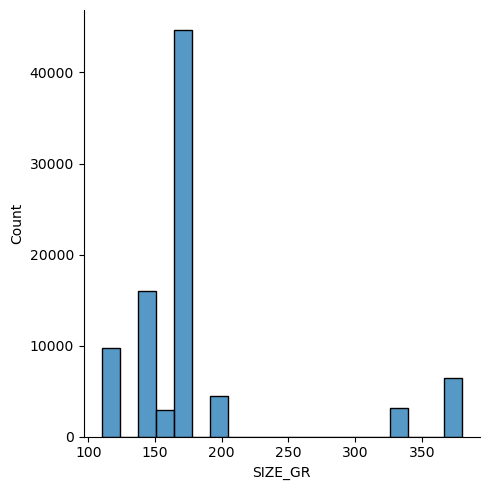

In [50]:
plt.figure(figsize=(30,15))
figure=sns.displot(new_data.SIZE_GR, kde=False, bins=20);   #product size graph

In [51]:
new_data['PROD_NAME'].head()  #choose brand name from here

0      natural chip        compny seasalt175g
2      smiths crinkle cut  chips chicken 170g
3      smiths chip thinly  s/cream&onion 175g
4    kettle tortilla chpshny&jlpno chili 150g
6    smiths crinkle chips salt & vinegar 330g
Name: PROD_NAME, dtype: object

In [52]:
brand_name=new_data['PROD_NAME'].str.split(" " , n=1 , expand=True).iloc[:,0]
brand_name.head()

0    natural
2     smiths
3     smiths
4     kettle
6     smiths
Name: 0, dtype: object

In [53]:
brand_name.value_counts()

smiths      16872
doritos     15874
thins       14075
cobs         9693
kettle       9580
ww           7443
natural      6050
dorito       3183
tostitos     3145
french       1418
Name: 0, dtype: int64

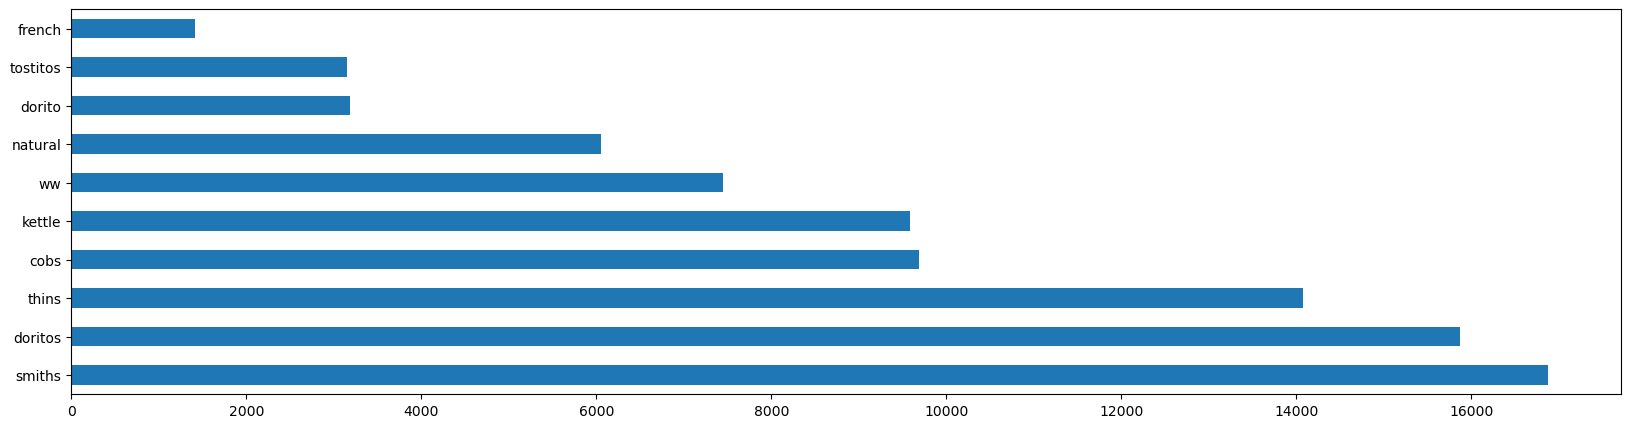

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
figure=brand_name.value_counts().plot.barh()

In [55]:
new_brand=pd.DataFrame(brand_name.value_counts())

In [56]:
new_brand.reset_index(inplace=True)

In [57]:
new_brand.index

RangeIndex(start=0, stop=10, step=1)

In [58]:
new_brand.columns=['Name' , 'Size']

In [59]:
new_brand

,Name,Size
0,smiths,16872
1,doritos,15874
2,thins,14075
3,cobs,9693
4,kettle,9580
5,ww,7443
6,natural,6050
7,dorito,3183
8,tostitos,3145
9,french,1418


In [60]:
new_brand['Name'].iloc[1]='dorito'

C:\Users\Hp\AppData\Local\Temp\ipykernel_9792\1320678377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_brand['Name'].iloc[1]='dorito'


In [61]:
new_brand  #here is 2 same brand

,Name,Size
0,smiths,16872
1,dorito,15874
2,thins,14075
3,cobs,9693
4,kettle,9580
5,ww,7443
6,natural,6050
7,dorito,3183
8,tostitos,3145
9,french,1418


In [62]:
new_brand=new_brand.groupby('Name').sum()
new_brand

,Size
Name,
cobs,9693
dorito,19057
french,1418
kettle,9580
natural,6050
smiths,16872
thins,14075
tostitos,3145
ww,7443


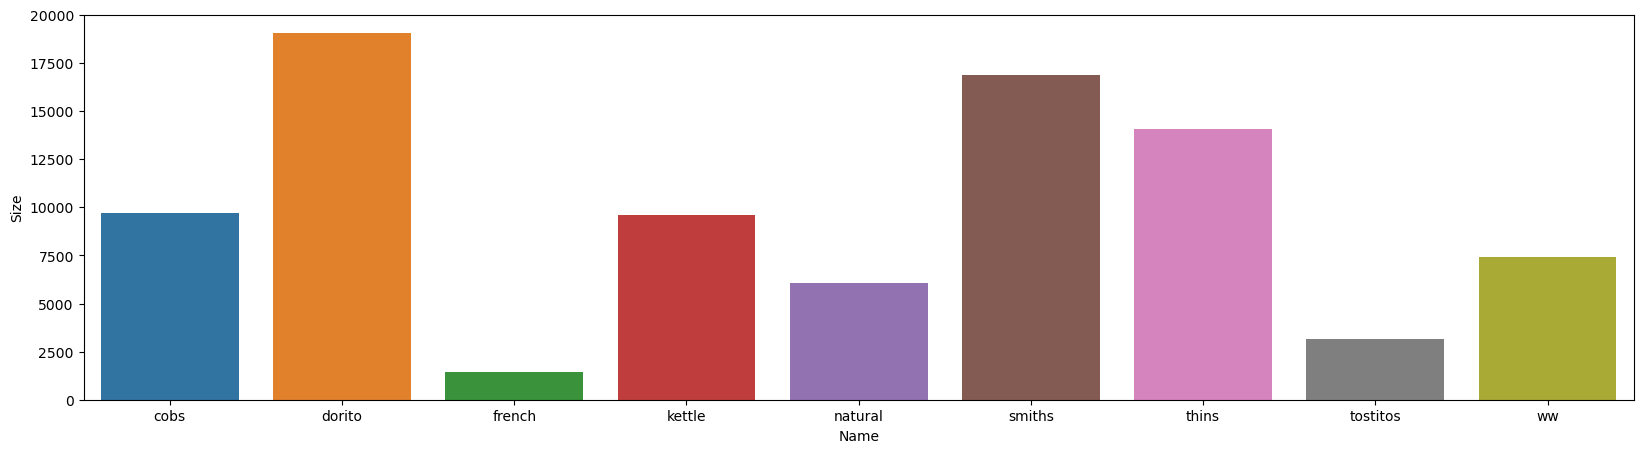

In [63]:
plt.figure(figsize=(20,5))
figure=sns.barplot(x=new_brand.index , y=new_brand['Size'] , data=new_brand)

# CUSTOMER BEHAVIOUR DATA

In [64]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df=pd.read_csv('QVI_purchase_behaviour.csv')
data=df.copy()

In [66]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [67]:
data.shape

(72637, 3)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


<AxesSubplot:ylabel='PREMIUM_CUSTOMER'>

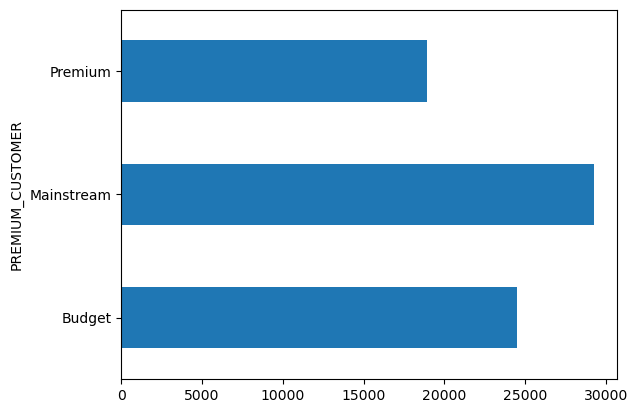

In [86]:
data['PREMIUM_CUSTOMER'].groupby(data['PREMIUM_CUSTOMER']).count().plot.barh()

<AxesSubplot:ylabel='LIFESTAGE'>

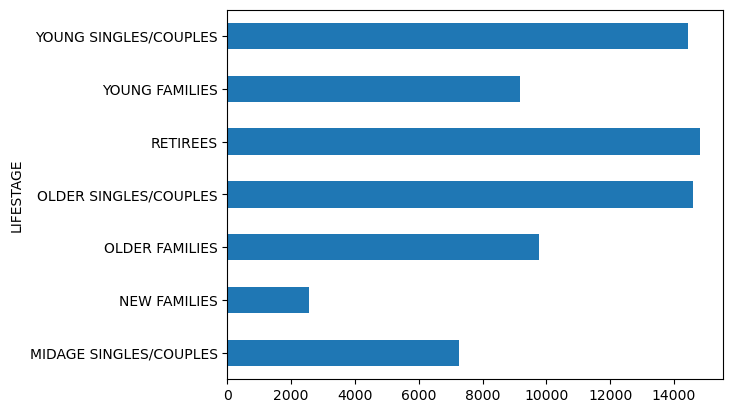

In [71]:
data['LIFESTAGE'].groupby(data['LIFESTAGE']).count().plot.barh()

In [72]:
#lets merge this 2 dataset
final_data=pd.merge(new_data , data , how='left')

In [73]:
final_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_GR,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.000000,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.900000,170,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,7.271701,175,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,7.271701,150,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-16,4,4149,3333,16,smiths crinkle chips salt & vinegar 330g,1,5.700000,330,MIDAGE SINGLES/COUPLES,Budget


In [74]:
final_data.shape

(87333, 11)

In [75]:
final_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
SIZE_GR             0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<AxesSubplot:ylabel='LIFESTAGE'>

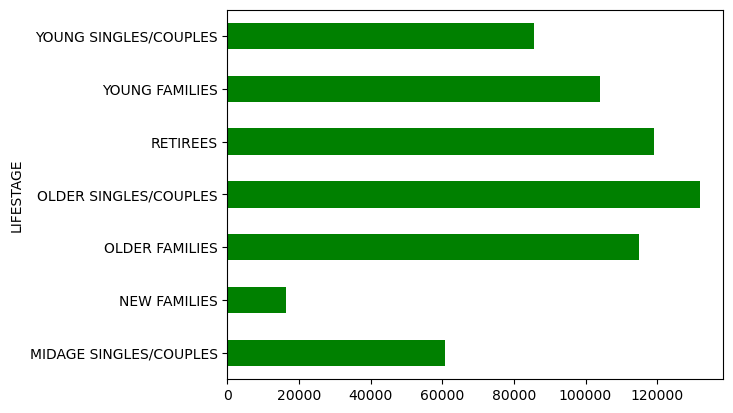

In [89]:
final_data.groupby(final_data['LIFESTAGE'])['TOT_SALES'].sum().plot.barh(color='g')

<AxesSubplot:ylabel='PREMIUM_CUSTOMER'>

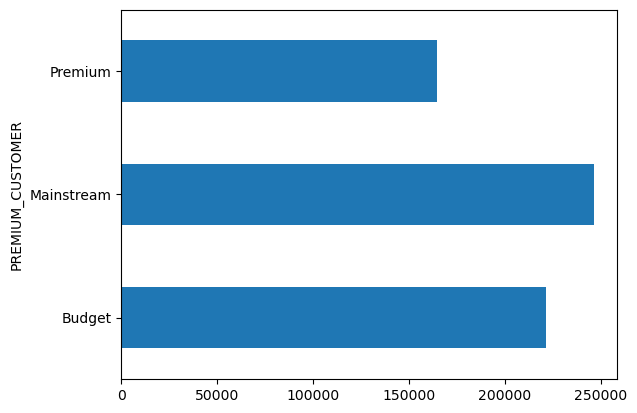

In [77]:
final_data.groupby(final_data['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().plot.barh()

In [78]:
final_data.groupby(final_data['LIFESTAGE'])['TOT_SALES'].sum()

LIFESTAGE
MIDAGE SINGLES/COUPLES     60641.759550
NEW FAMILIES               16436.843403
OLDER FAMILIES            114800.036981
OLDER SINGLES/COUPLES     131863.080384
RETIREES                  119200.559550
YOUNG FAMILIES            104012.618057
YOUNG SINGLES/COUPLES      85495.122744
Name: TOT_SALES, dtype: float64

<AxesSubplot:ylabel='PREMIUM_CUSTOMER,LIFESTAGE'>

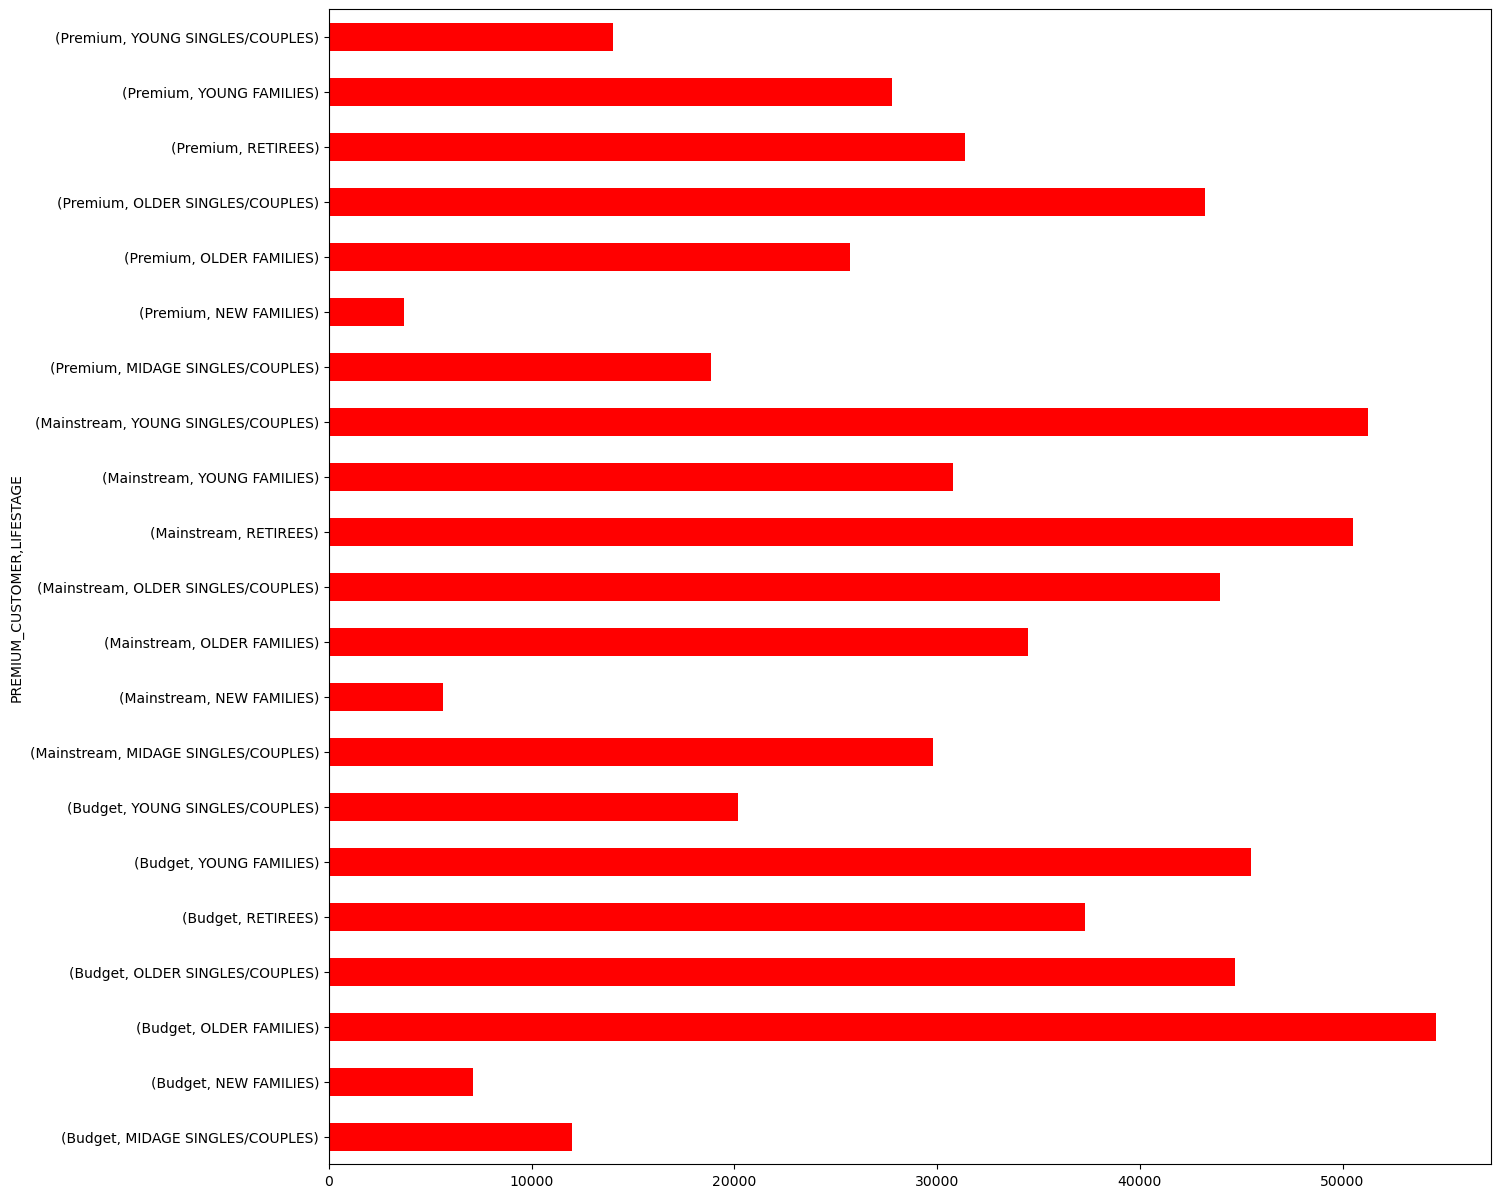

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,15])
final_data.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])['TOT_SALES'].sum().plot.barh(color='r')

<AxesSubplot:ylabel='LIFESTAGE,SIZE_GR'>

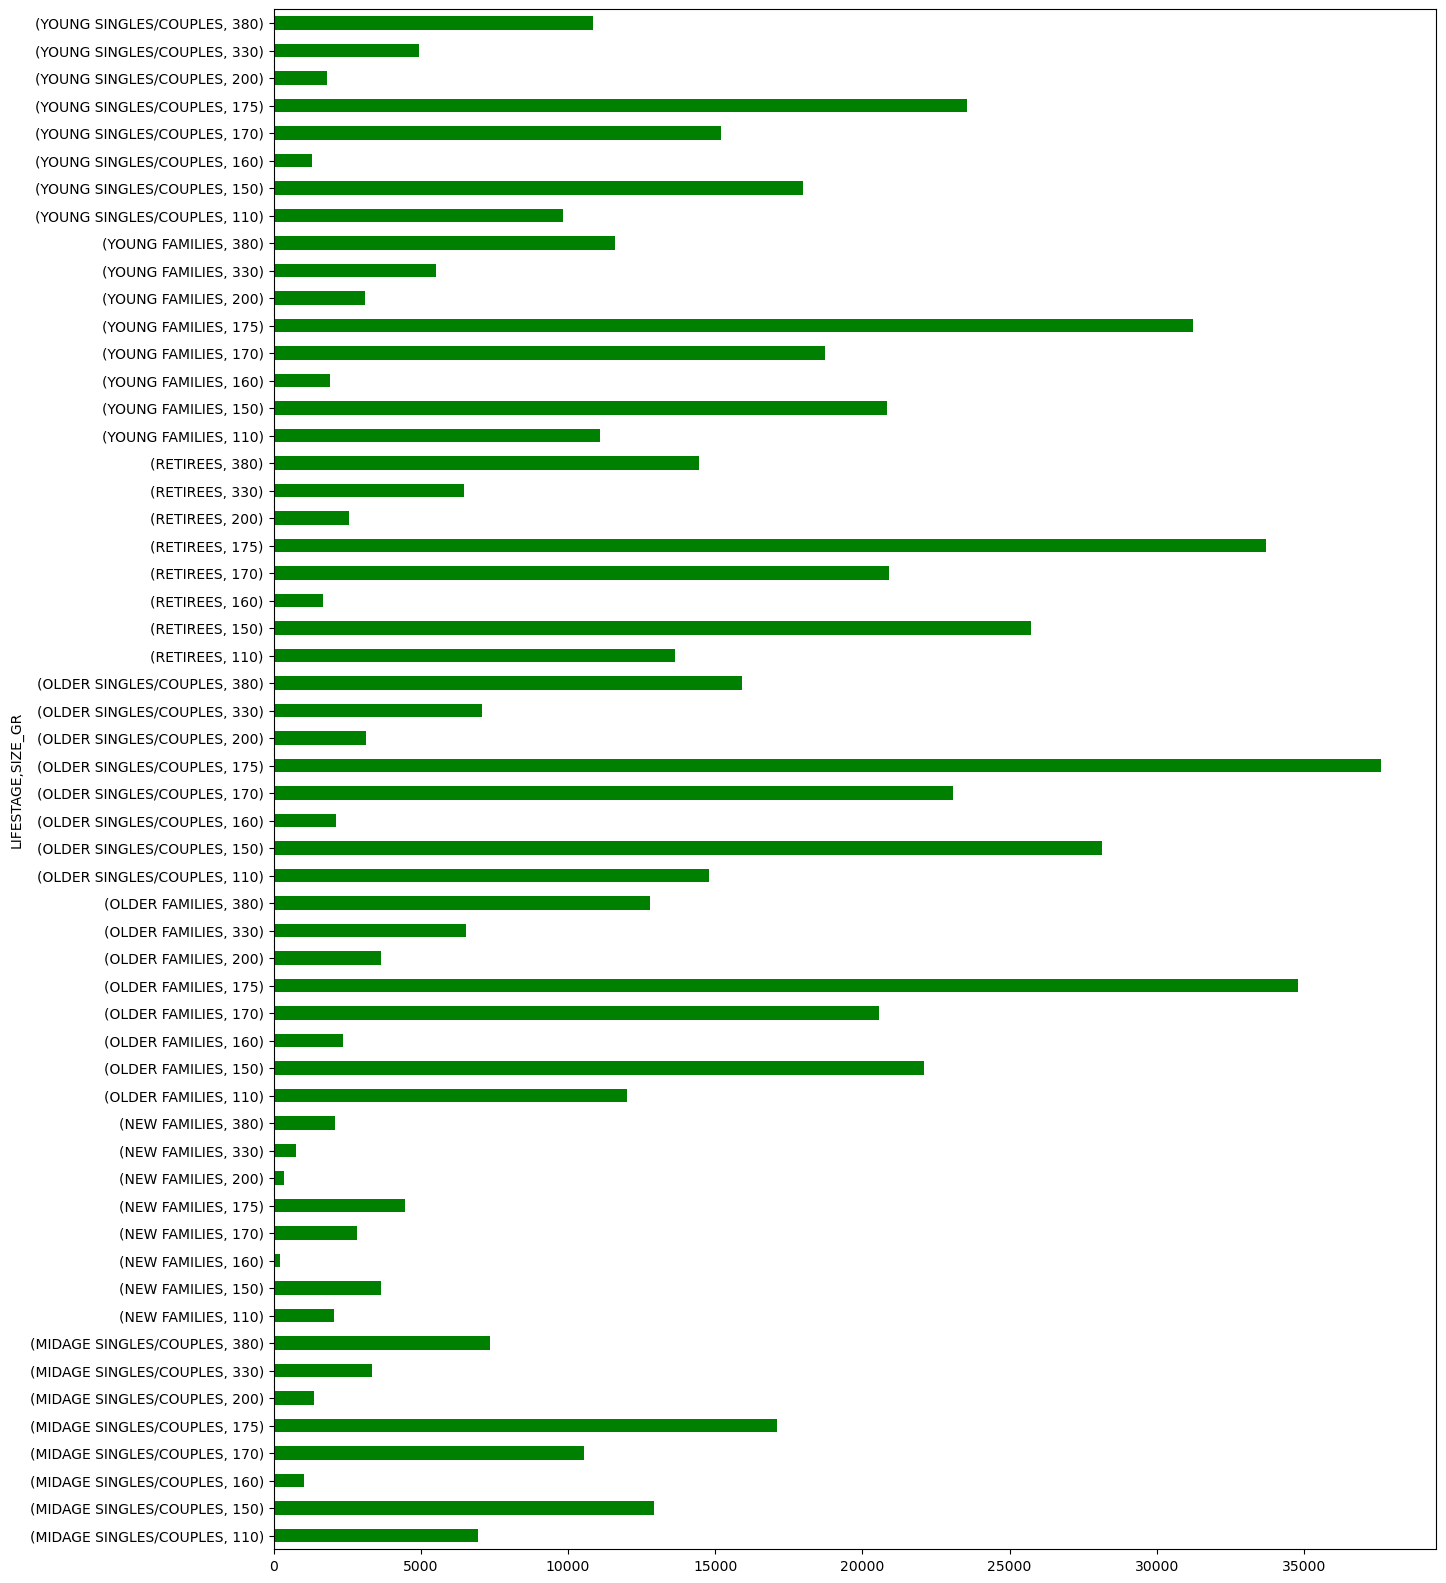

In [81]:
plt.figure(figsize=[15,20])
final_data.groupby(["LIFESTAGE" , "SIZE_GR"])["TOT_SALES"].sum().plot.barh(color='g')

In [82]:
final_data.groupby("LIFESTAGE")['TOT_SALES'].sum()

LIFESTAGE
MIDAGE SINGLES/COUPLES     60641.759550
NEW FAMILIES               16436.843403
OLDER FAMILIES            114800.036981
OLDER SINGLES/COUPLES     131863.080384
RETIREES                  119200.559550
YOUNG FAMILIES            104012.618057
YOUNG SINGLES/COUPLES      85495.122744
Name: TOT_SALES, dtype: float64

<AxesSubplot:xlabel='TOT_SALES', ylabel='Density'>

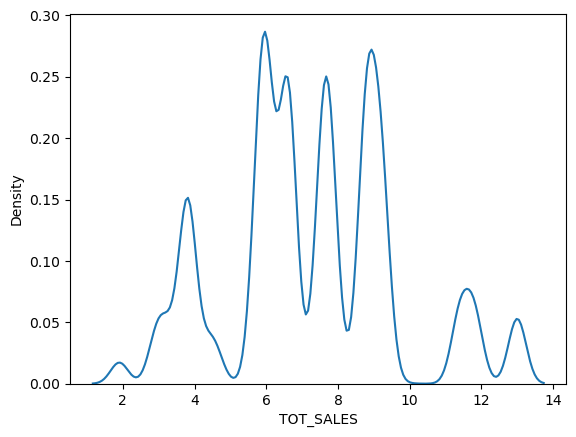

In [84]:
sns.kdeplot(x=final_data['TOT_SALES'])  #this look liike normal distribution